In [1]:
import requests
import numpy as np
from astropy.io import fits
import gzip
from io import BytesIO
from bs4 import BeautifulSoup

webpage_url = 'https://nispdata.nso.edu/ftp/flare_patrol_h_alpha_sp/quicklook/233/'#图片网址

response = requests.get(webpage_url)
soup = BeautifulSoup(response.content, 'html.parser')

image_data_list = []
y_list = [] #索引
for link in soup.find_all('a'):
    filename = link.get('href')

    if filename.endswith('.fts.gz'):
        file_url = f'{webpage_url}/{filename}'
        #print(file_url)

        response_file = requests.get(file_url)

        with gzip.open(BytesIO(response_file.content), 'rb') as f:
            hdul = fits.open(BytesIO(f.read()))

        # 获取文件中的数据
        data = np.flipud(hdul[0].data).astype(np.float32)

        # 存储图像数据到列表
        image_data_list.append(data)
        y_list.append(filename[:-7])

        # 关闭 FITS 文件
        hdul.close()

In [ ]:
'''
import requests
from bs4 import BeautifulSoup
import numpy as np
from astropy.io import fits
import gzip
from io import BytesIO

base_url = 'https://nispdata.nso.edu/ftp/flare_patrol_h_alpha_sp/quicklook/'

response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')

image_data_list = []
y_list = []  # 索引

# 遍历基础网页上的所有链接
for link in soup.find_all('a'):
    foldername = link.get('href')
    folder_url = f'{base_url}{foldername}'# 构建这个子文件夹的完整URL

    response_folder = requests.get(folder_url)## 获取子文件夹内容   
    soup_folder = BeautifulSoup(response_folder.content, 'html.parser')
        
    ## 遍历子文件夹中的所有文件
    for file_link in soup_folder.find_all('a'):
        filename = file_link.get('href')
            
        if filename.endswith('.fts.gz'):
            file_url = f'{folder_url}{filename}'
                
            ## 提取并处理文件
            response_file = requests.get(file_url)
            with gzip.open(BytesIO(response_file.content), 'rb') as f:
                hdul = fits.open(BytesIO(f.read()))
                
            data = np.flipud(hdul[0].data).astype(np.float32)## 获取文件中的数据
                
            ## 存储图像数据到列表
            image_data_list.append(data)
            y_list.append(filename[:-7])
                
            hdul.close()# 关闭FITS文件

print(f'Total images loaded: {len(image_data_list)}')
'''

In [2]:
print(len(y_list))

399


In [3]:
import numpy as np

filter_data = [] #滤波器
rell_number_data = [] #卷轴号
date_data = [] #日期
hour_data = [] #时
minute_data = [] #分
seconds_data = [] #秒
for n in range(len(y_list)):
    img=image_data_list[n]
    cropped_img = img[:, 1800:] #信息数据集
    rotated_img = np.rot90(cropped_img) #旋转
    cropped_img = img[:, 1800:] #信息数据集
    rotated_img = np.rot90(cropped_img) #旋转
    filter_img = rotated_img[:, 100:400] #滤波器
    filter_data.append(filter_img)
    rell_number_img = rotated_img[0:100, 400:800] #卷轴号
    rell_number_data.append(rell_number_img)
    date_img = rotated_img[100:, 400:800] #日期
    date_data.append(date_img)
    hour_img = rotated_img[:, 800:1000] #时
    hour_data.append(hour_img)
    minute_img = rotated_img[:, 1000:1200] #分
    minute_data.append(minute_img)
    seconds_img = rotated_img[:, 1200:1300] #秒
    seconds_data.append(seconds_img)

In [10]:
a=filter_data[398]/np.max(filter_data[1])
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

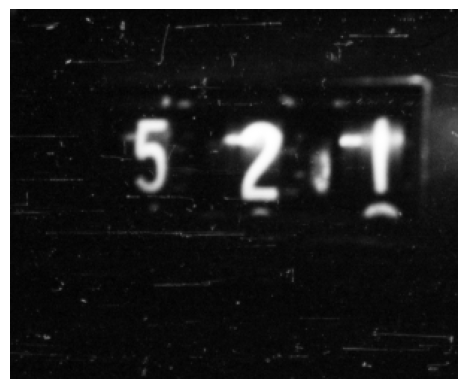

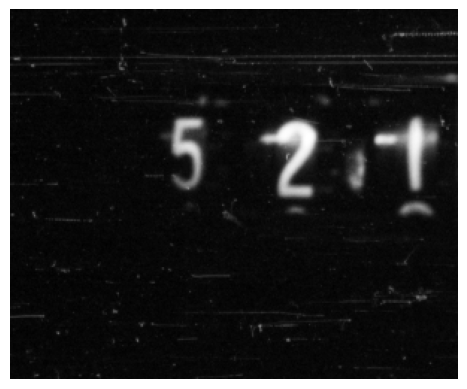

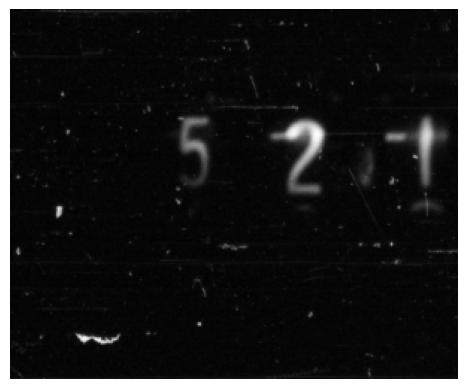

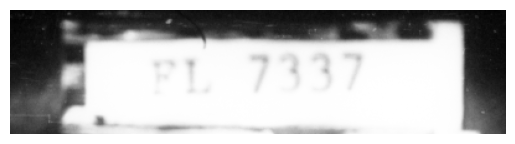

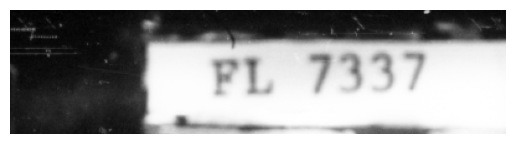

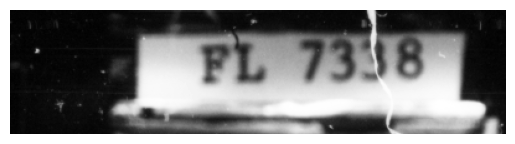

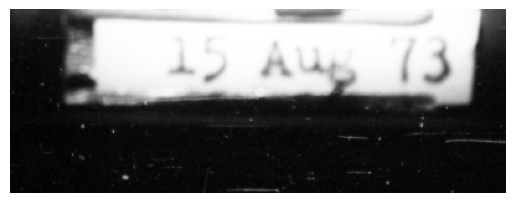

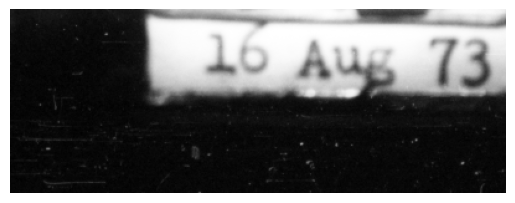

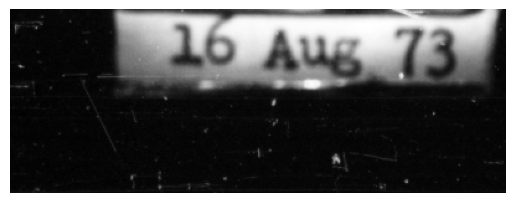

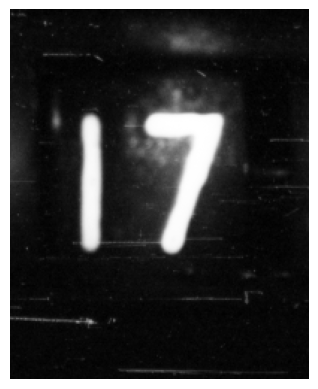

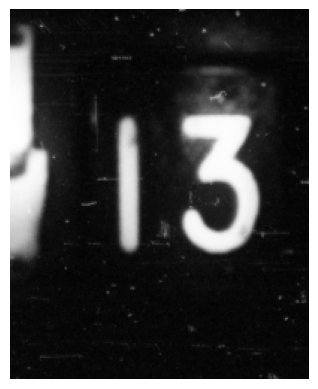

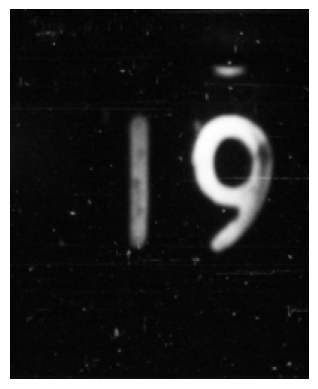

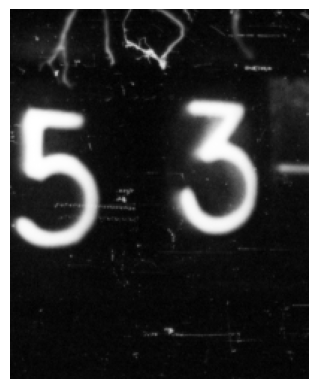

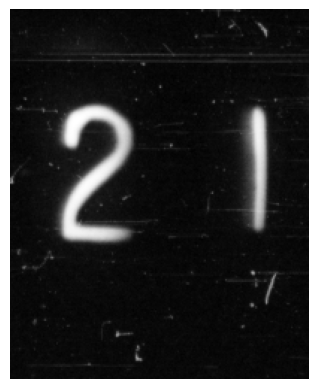

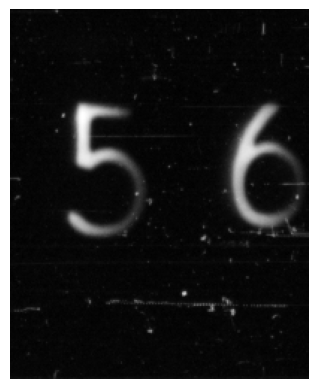

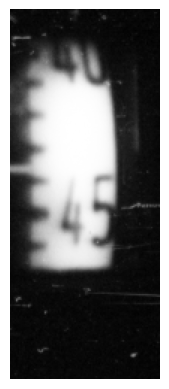

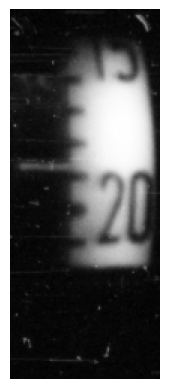

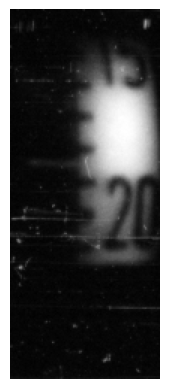

In [5]:
import matplotlib.pyplot as plt
list_img=[filter_data,rell_number_data,date_data,hour_data,minute_data,seconds_data]#
for i in range(6):
    for j in range(3):
        plt.imshow(list_img[i][j], cmap='gray')
        plt.axis('off')
        plt.show()